In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

#### Проанализируйте ряды, сделайте их стационарными.

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

#### Пробуем привести первый ряд к стационарному виду

In [4]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


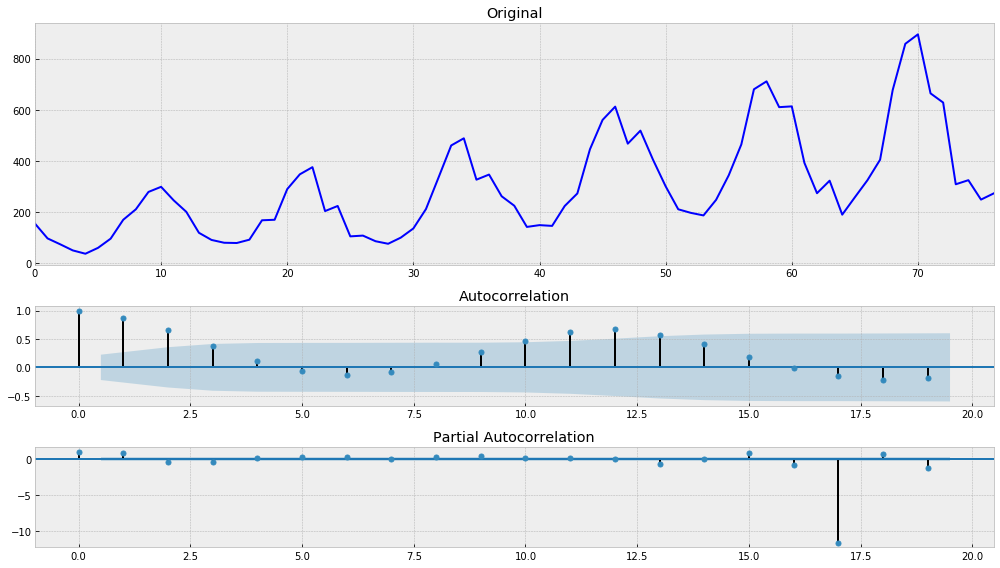

In [5]:
tsplot(series)

In [6]:
series = boxcox(series, 0)
#series = series[12:] - series[:-12]
#series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


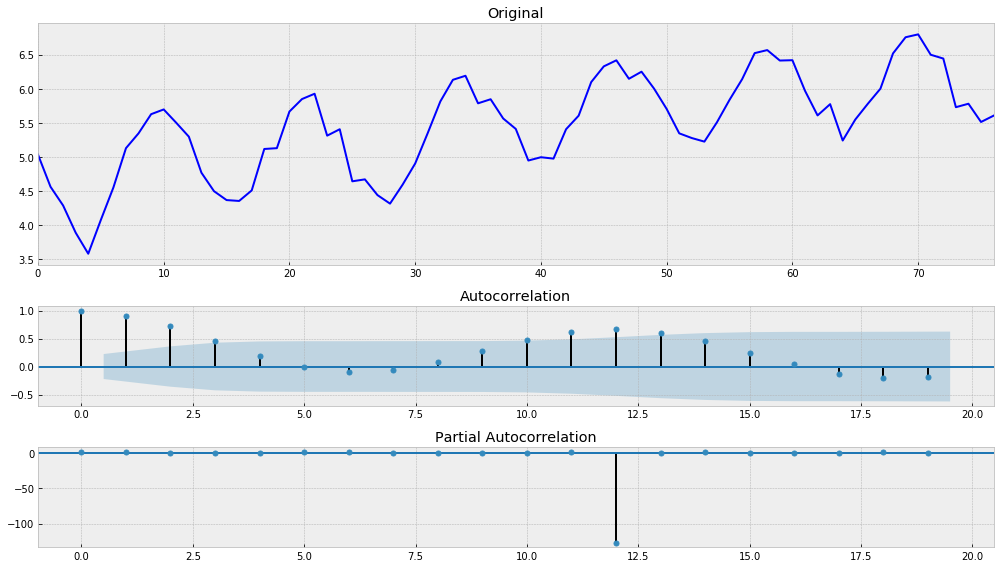

In [7]:
tsplot(series)

По графику автокорреляции очень заметно влияние сезонности - во-вторую очередь уберем её.

In [8]:
#series = series[1:] - series[:-1]
series = series[12:] - series[:-12]
#series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -2.385128
p-value                         0.145978
#Lags Used                     11.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


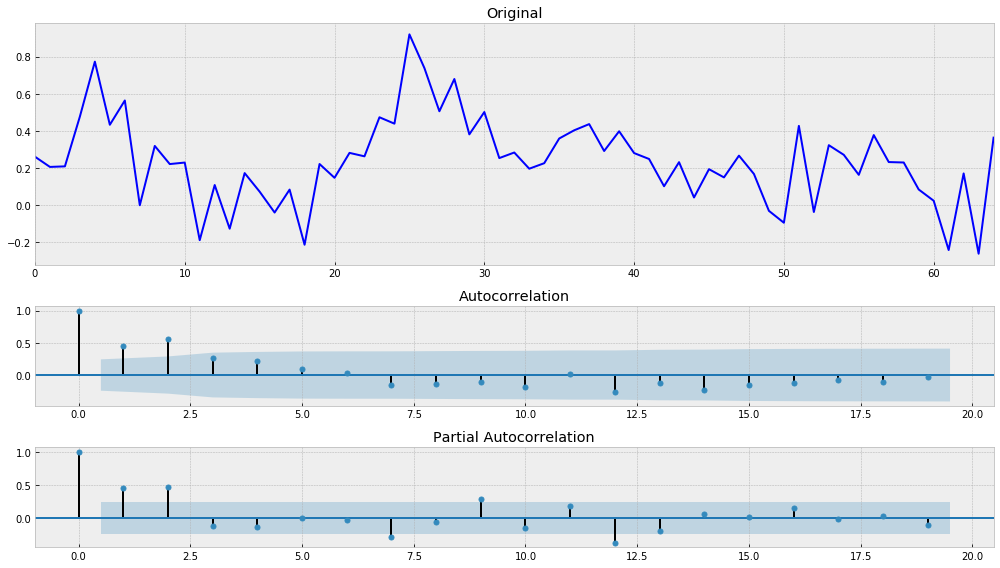

In [9]:
tsplot(series)

Возможно стало и лучше, но при исключении сезонности, кажется, что пропал и тренд. Попробуем исключить влияние тренда сперва

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


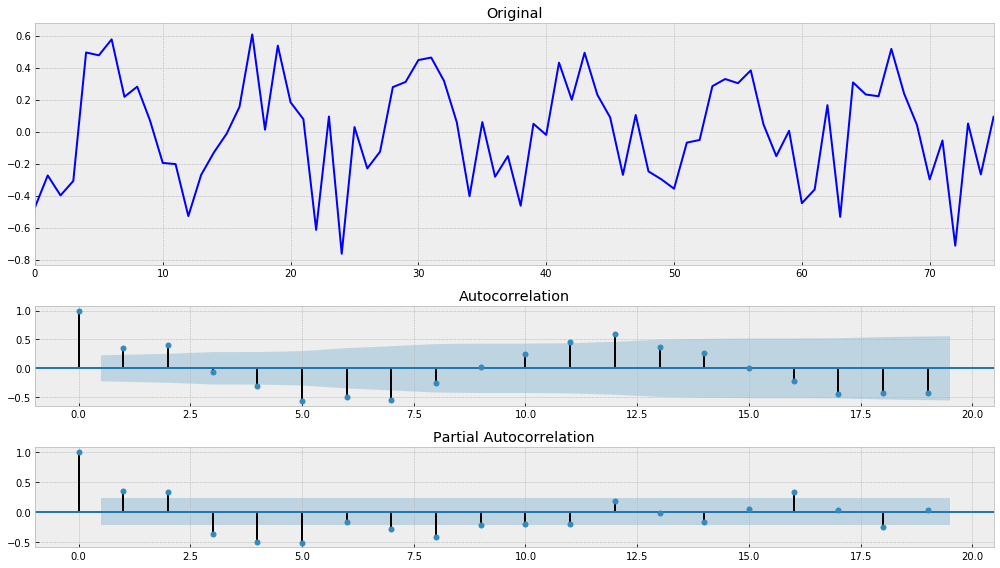

In [10]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']
series = boxcox(series, 0)
series = series[1:] - series[:-1]
tsplot(series)

Здесь удалось добиться значительного улучшения, и даже тест отвергает нулевую гипотезу о нестационарности ряда. Хотя, на графике еще можно заметить сезонное влияние, убирать его не стоит, т.к. его характер изменяется значительно с течением времени.

#### Пробуем другой временной ряд

In [11]:
series_2 = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


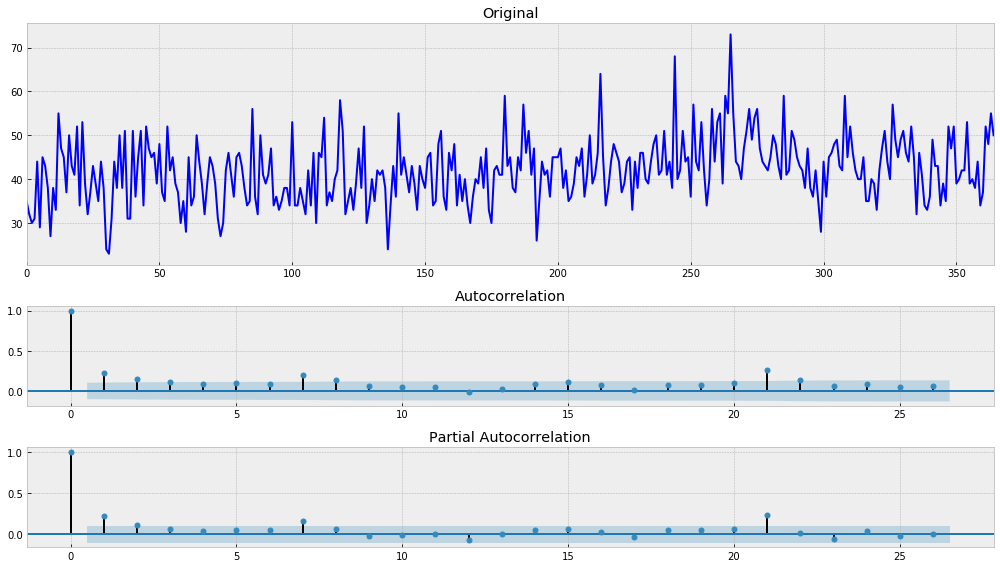

In [12]:
tsplot(series_2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


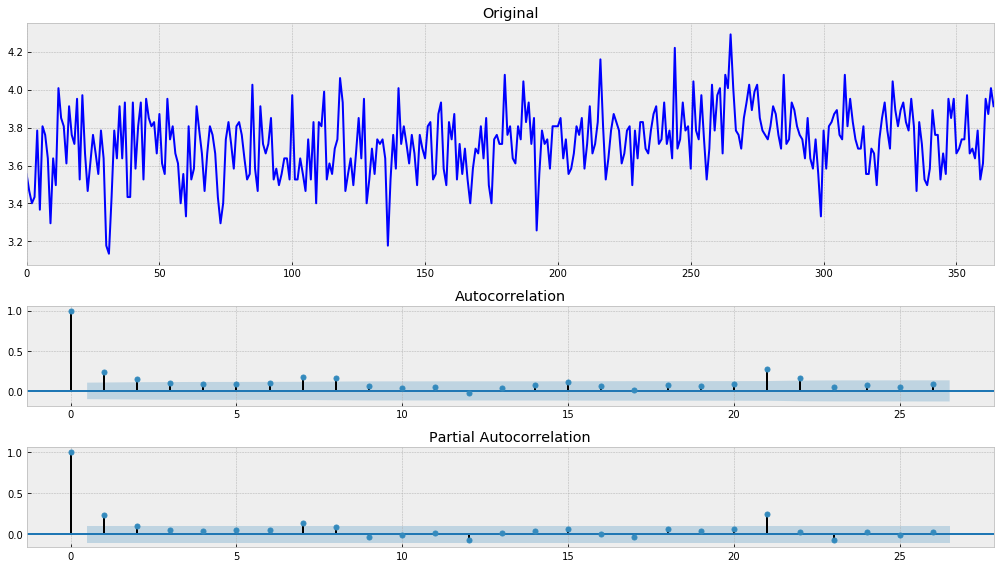

In [13]:
series_2 = boxcox(series_2, 0)
tsplot(series_2)

Выглядит и так стационарно
#### Еще одна попытка

In [14]:
series_3 = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


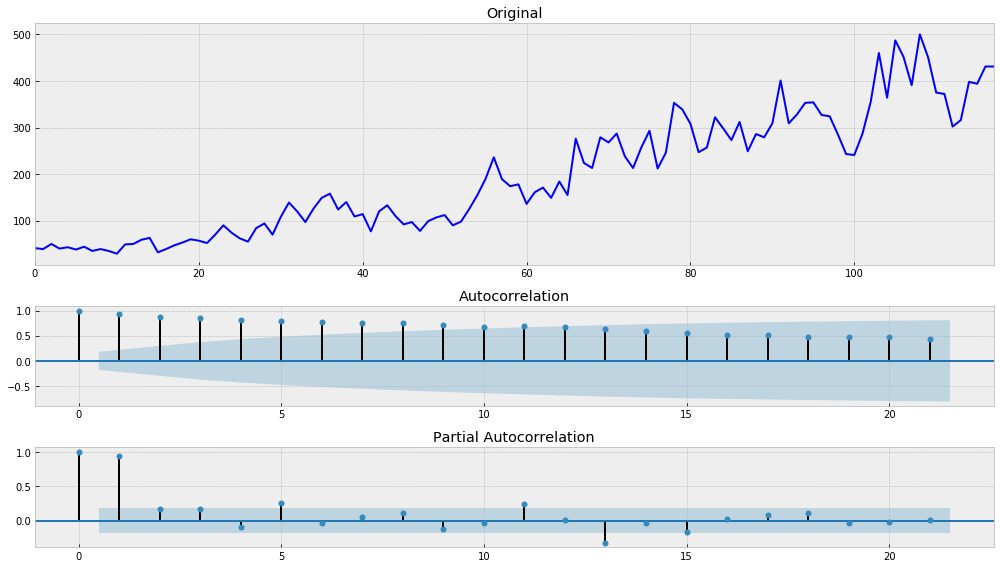

In [15]:
tsplot(series_3)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


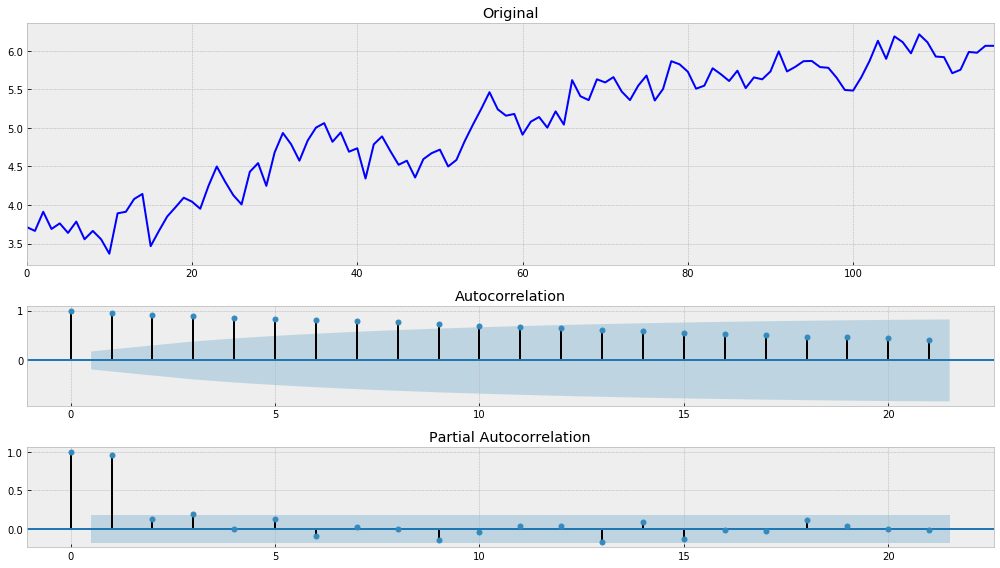

In [16]:
series_3 = boxcox(series_3, 0)
tsplot(series_3)

Тренд очевиден, нормализируем его

In [18]:
series_3 = series_3[1:] - series_3[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


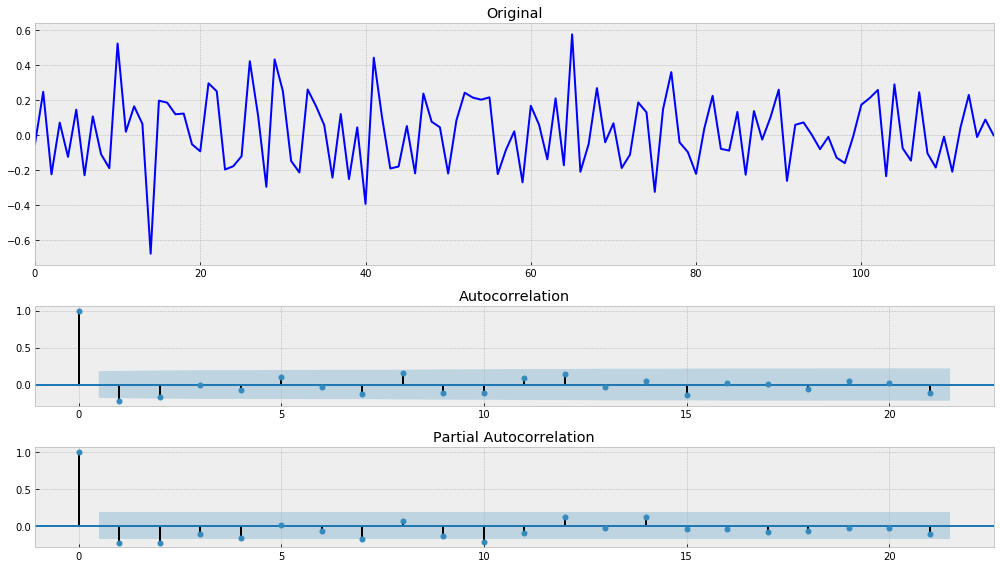

In [19]:
tsplot(series_3)

С моей точки зрения кривая и графики автокорреляции выглядят довольно хорошо но тест Дики-Фуллера этого не подтверждает. В данном случае, мы имеем дело с уличной преступностью, а значит фактор сезонности должен быть значим (национальные праздники, выходные, количество дней в месяце, и погода(холод/количество дождливых дней в Бостоне)

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


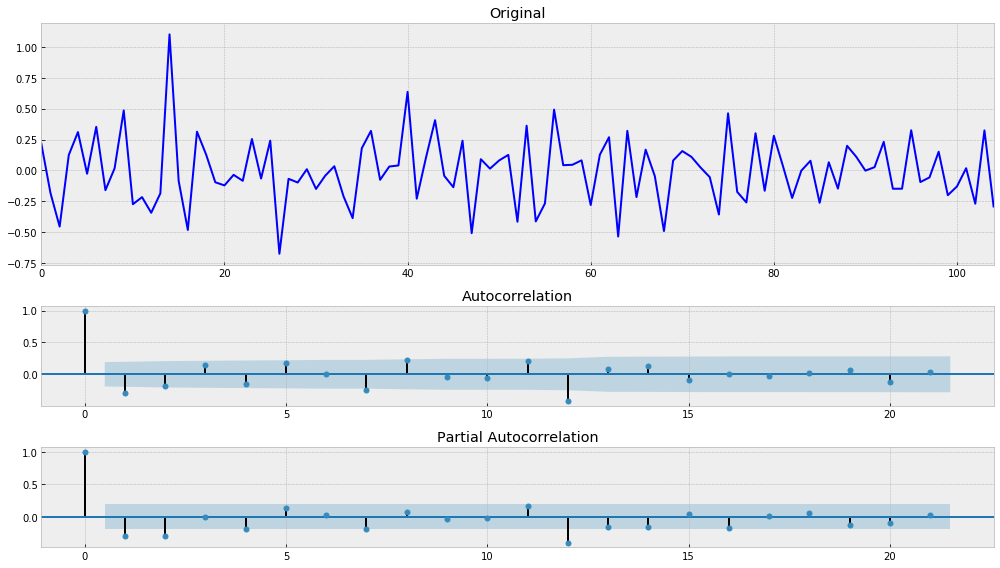

In [20]:
series_3 = series_3[12:] - series_3[:-12]
tsplot(series_3)

Исключение фактора сезонности сыграло свою роль. Данные стационарны